In [1]:
import numpy as np

In [2]:
%store -r allDict

In [23]:
%store -r x_train_arr

In [4]:
%store -r y_train_arr

In [71]:
import copy
bckup = copy.deepcopy(x_train_arr)

In [16]:
revDict = {v: k for k,v in allDict.items()}

In [50]:
h,w = 28, 28
center = (h/2, w/2)

In [31]:
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    return ax

In [9]:
def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])


In [76]:
def showImagesAndLabels(chr: str):
    indices = np.where(y_train_arr == revDict[chr])[0]
    print(indices)
    rndm_idx = np.random.choice(indices, size=12)

    fig, axes = plt.subplots(3, 4, figsize=(12, 8))
    for i,ax in enumerate(axes.flat):
        # dividing by 255 to suppress pyplot messages
        ima = x_train_arr[rndm_idx[i]]
        ax = show_img(ima, ax=ax)
        draw_text(ax, (0,0), chr)
    plt.tight_layout()

In [68]:
def correctImage(img):
    ima = cv2.flip(img, 0)/255  
    M = cv2.getRotationMatrix2D(center, 270, 1.0)
    ima = cv2.warpAffine(ima, M, (w,h))
    return ima

In [ ]:
len(x_tr)

In [74]:
from tqdm import tqdm
def correctImages():
    for i in tqdm(range(len(y_train_arr))):
        img = x_train_arr[i]
        x_train_arr[i] = correctImage(img)

In [75]:
correctImages()

100%|██████████| 112800/112800 [00:03<00:00, 32997.68it/s]


[    31     40     82 ... 112619 112628 112726]


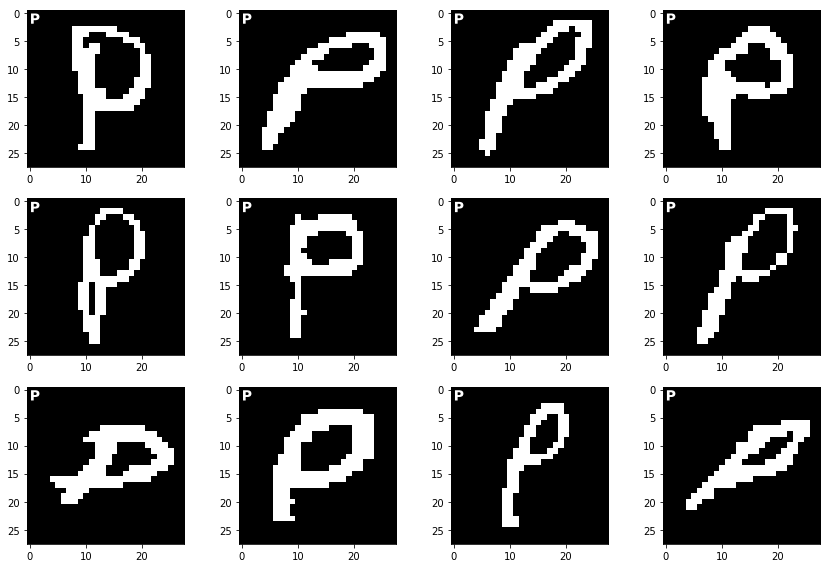

In [77]:
showImagesAndLabels('P')

[    66     91    115 ... 112666 112762 112788]


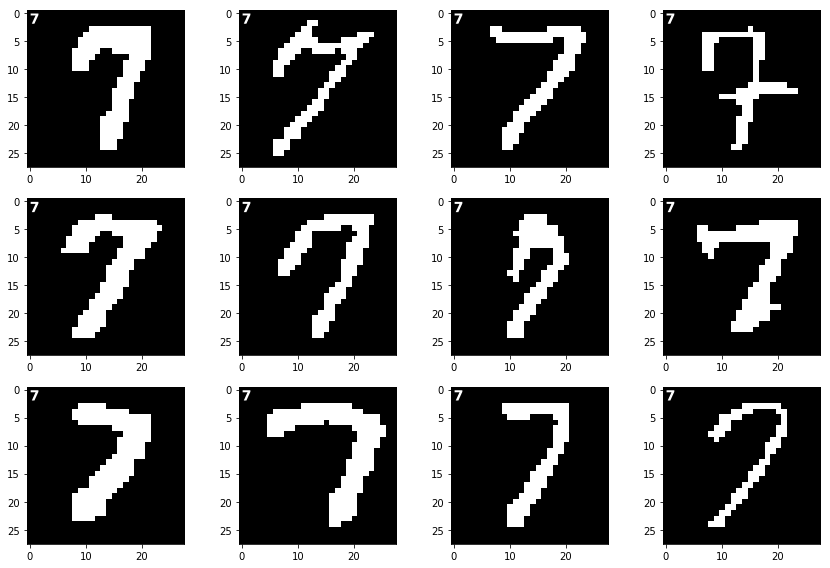

In [78]:
showImagesAndLabels(7)

In [79]:
import numpy as np

In [80]:
np.save("x_train_arr", x_train_arr)

In [81]:
np.save("y_train_arr", y_train_arr)

In [82]:
%store x_train_arr

Stored 'x_train_arr' (ndarray)


In [83]:
%store y_train_arr

Stored 'y_train_arr' (ndarray)


[     1     56    152 ... 112700 112722 112761]


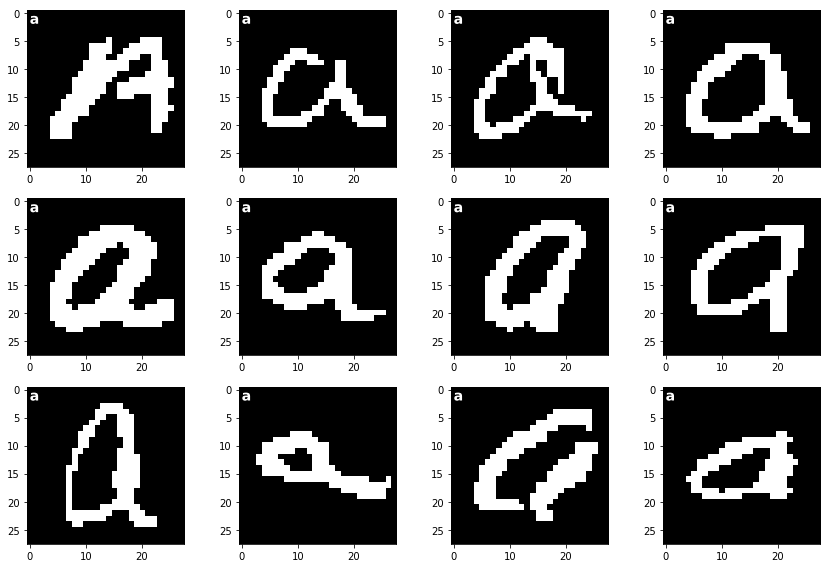

In [84]:
showImagesAndLabels('a')

[     6     36     74 ... 112684 112781 112789]


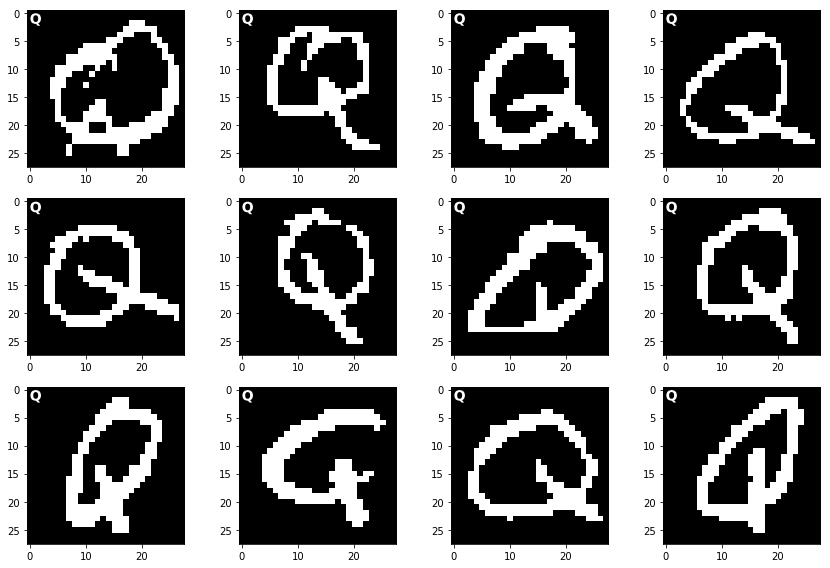

In [86]:
showImagesAndLabels('Q')

[    33     35     87 ... 112765 112773 112780]


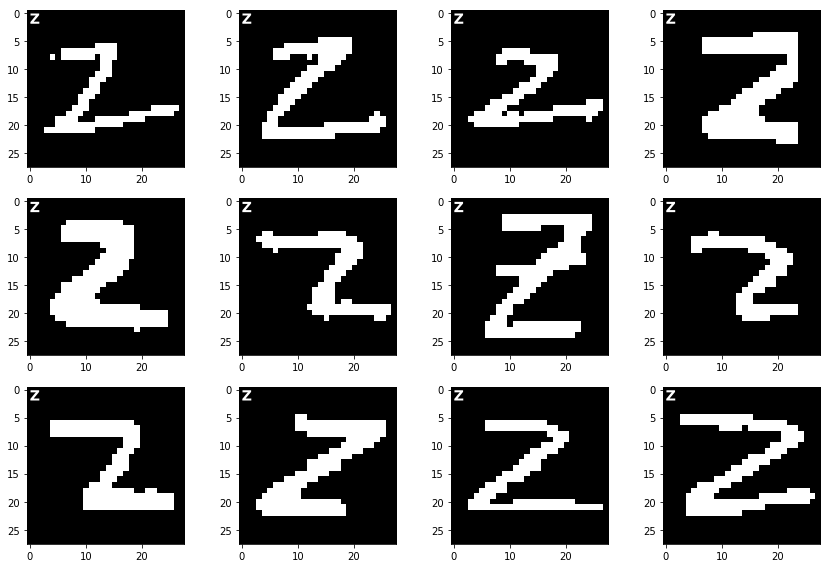

In [87]:
showImagesAndLabels('Z')

### Now, try to upscale the image to 224x224. This is because I'd like to use VGG or ResNet on the dataset.

In [88]:
imSmall = x_train_arr[9]

In [89]:
imSmall.shape

(28, 28, 3)

In [90]:
import cv2

In [91]:
imBig = cv2.resize(imSmall, (224,224), interpolation=cv2.INTER_CUBIC)

In [92]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


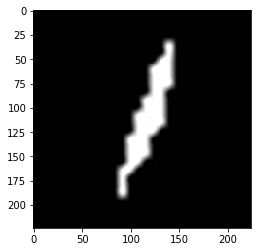

In [93]:
plt.imshow(imBig)

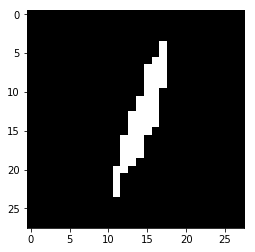

In [94]:
plt.imshow(imSmall)

In [95]:
imBig.shape

(224, 224, 3)

In [100]:
def showSmallAndBigImage(interpolation, index):

    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    for i,ax in enumerate(axes.flat):
        # dividing by 255 to suppress pyplot messages
        if(i==0):
            ima = x_train_arr[index]
        else:
            ima = cv2.resize(x_train_arr[index], (224,224), interpolation)
        ax = show_img(ima, ax=ax)
        draw_text(ax, (0,0), interpolation)
    plt.tight_layout()

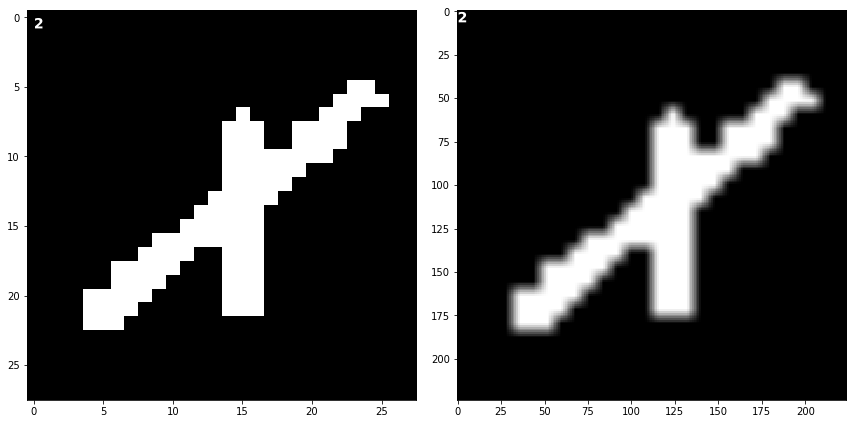

In [102]:
showSmallAndBigImage(cv2.INTER_CUBIC, 100)

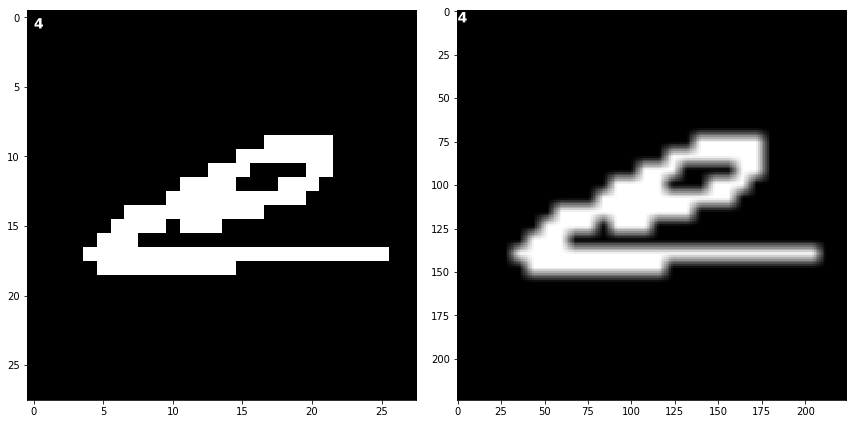

In [103]:
showSmallAndBigImage(cv2.INTER_LANCZOS4, 200)

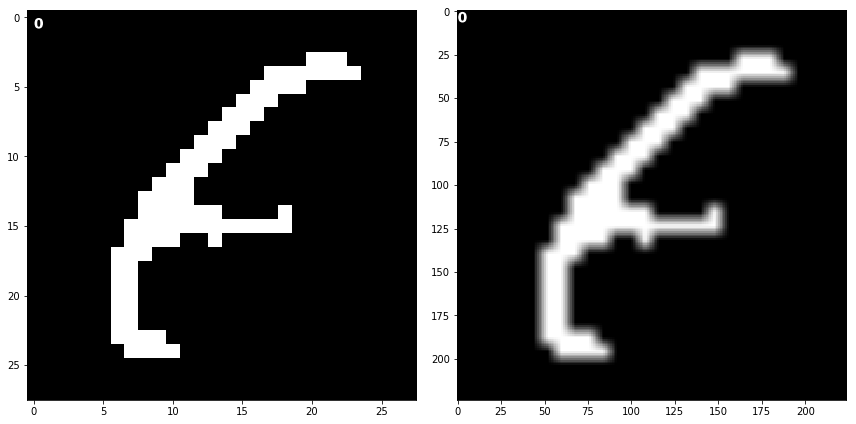

In [104]:
showSmallAndBigImage(cv2.INTER_NEAREST, 300)

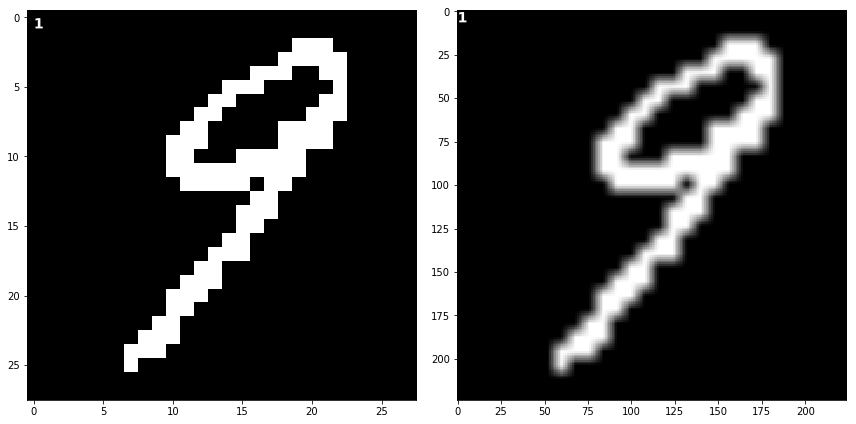

In [105]:
showSmallAndBigImage(cv2.INTER_LINEAR, 500)

## Save the upscaled version of the images

In [107]:
num_samples = len(x_train_arr)
num_samples

112800

In [144]:
names = []
clazz = []
save_path = "/home/apil/data/emnist/"

In [145]:
from tqdm import tqdm
for i in tqdm(range(len(y_train_arr))):
    img_ = "img_" + str(i) + ".jpg"
    name = save_path + img_
    imgBig = cv2.resize(x_train_arr[i], (224,224), cv2.INTER_LINEAR)
    cv2.imwrite(name, imgBig * 255)
    names.append(img_)
    clazz.append(int(y_train_arr[i]))

100%|██████████| 112800/112800 [02:31<00:00, 746.25it/s]


In [146]:
import pandas as pd

In [147]:
df = pd.DataFrame({'name':names, 'clazz':clazz})

In [148]:
df.to_csv('emnist.csv',columns=['name','clazz'], index=False, header=False)